In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

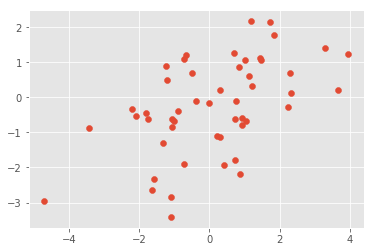

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

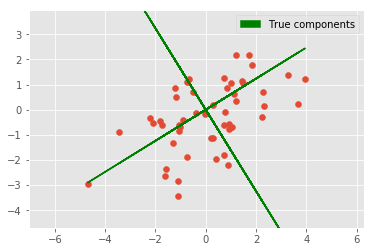

In [3]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [5]:
W_true

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [4]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

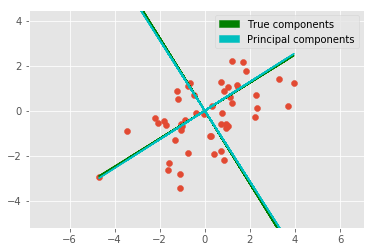

In [6]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

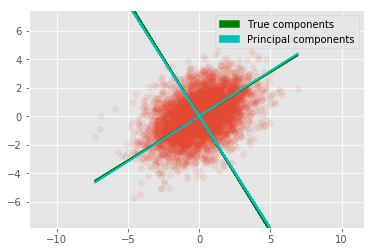

In [7]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')


In [31]:
scoring = []
for i in range(1, data.shape[1] + 1):
    model = PCA(n_components = i)
    scores = cv_score(model, data, cv = 3)
    scoring.append(scores.mean())
write_answer_1(scoring.index(max(scoring)) + 1)

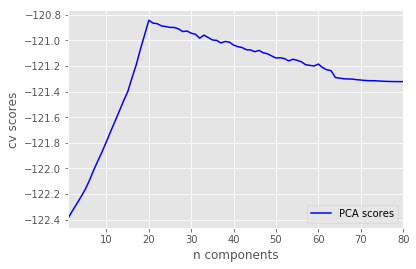

In [32]:
plot_scores(np.array(scoring))

In [33]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

In [35]:
data.shape[1]

100

In [43]:
model = PCA(n_components = data.shape[1])
model.fit(data)
components = model.components_
d_variances = model.explained_variance_
transformed_data = model.transform(data)

In [56]:
d_variances = model.explained_variance_
transformed_data = model.transform(data)

#plot_variances(d_variances)

delta_var = dict()
for i in range(1,len(d_variances)):
    delta_var[i] = d_variances[i-1]-d_variances[i]
#delta_var

sorted_delta_var = sorted(delta_var.items(), key=lambda x: x[1] , reverse=True)
#sorted_delta_var

write_answer_2(sorted_delta_var[0][0])

#print(r'Эффективная размерность данных $\hat{d}$ = ' + str(sorted_delta_var[-1][0]))

In [48]:
d = dict(short='dict', long='dictionary')
d.keys()

['short', 'long']

In [58]:
model.transform(data).shape

(3000L, 100L)

In [59]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

In [60]:
data.shape

(150L, 4L)

In [61]:
model = PCA(n_components = data.shape[1])
model.fit(data)
transformed_data = model.transform(data)

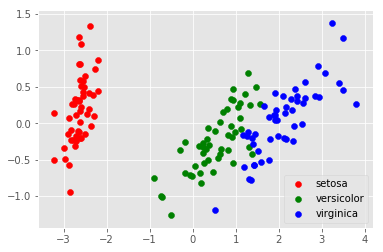

In [62]:
plot_iris(transformed_data, target, target_names)

In [70]:
transformed_data[target == 0, 0].shape

(50L,)

In [83]:
def most_correlation(feature, trans_feature_0, trans_feature_1):
    if (np.corrcoef(feature, trans_feature_0)[0][1] > np.corrcoef(feature, trans_feature_1)[0][1]):
        return 0
    else:
        return 1
  

In [84]:
new_list = []
for i in range(4):
    new_list.append(most_correlation(feature = data[:,i], trans_feature_0 = transformed_data[:,0], 
                                     trans_feature_1 = transformed_data[:,1]))
new_list

[0, 1, 0, 0]

In [87]:
list_pc1 = []
list_pc2 = []
for i in range(len(new_list)):
    if new_list[i] == 0:
        list_pc1.append(i+1)
    else:
        list_pc2.append(i+1)

In [88]:
list_pc1

[1, 3, 4]

In [89]:
write_answer_3(list_pc1, list_pc2)

In [91]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Vasily\scikit_learn_data


In [92]:
data.shape

(400L, 4096L)

In [180]:
model = PCA(n_components = 10, svd_solver='randomized',random_state = 0)

In [181]:
model.fit(data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='randomized', tol=0.0, whiten=False)

In [182]:
transformed_data = model.transform(data)

In [183]:
transformed_data[:,:10].shape

(400L, 10L)

In [184]:
for i in range(10):
    transformed_data[:,i] = transformed_data[:,i] - np.mean(transformed_data[:,i])

In [189]:
z = np.zeros((transformed_data.shape[0], 10))
for i in range (transformed_data.shape[0]):
    for j in range (10):
        z[i, j] = transformed_data[i,j] ** 2 / (np.sum(transformed_data[i,:] ** 2))
z

array([[2.06952013e-02, 5.34015347e-01, 1.91757361e-01, ...,
        1.45651594e-01, 1.95518013e-03, 1.13034190e-02],
       [2.49857977e-01, 2.98156454e-02, 4.92488637e-01, ...,
        2.77579564e-03, 1.92049520e-02, 4.00947550e-03],
       [3.87641759e-01, 5.10123306e-03, 1.27784806e-02, ...,
        2.63351731e-02, 7.40870403e-02, 4.28953867e-02],
       ...,
       [7.71866384e-02, 6.54554033e-02, 6.36802266e-01, ...,
        8.20815160e-03, 4.58286659e-02, 4.23512810e-02],
       [1.15948874e-01, 3.40883144e-01, 1.27948927e-01, ...,
        1.54265763e-02, 1.97965661e-02, 3.01440939e-02],
       [5.68297503e-01, 1.33769438e-01, 1.20255859e-04, ...,
        2.91888313e-02, 1.57054571e-02, 5.37428199e-02]])

In [190]:
list_pc = []
list_pc = z.argmax(axis=0)
        
    
    

In [191]:
list_pc

array([197,  18,  66, 319, 363, 131, 142, 382, 353, 140], dtype=int64)

In [179]:
write_answer_4(list_pc)

In [155]:
np.sum(transformed_data[:,1] ** 2)

4417.63